In [1]:
##Impoting essential libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px


#### 1️⃣ Data Loading & Initial Exploration

    - Load the dataset (Dataset2.csv).

    - Display info(), head(), and describe() to understand structure.
    
    - Identify missing values.

In [2]:
# Read the dataset
df2 = pd.read_csv('Dataset2.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df2.info())

print("\
First few rows of the dataset:")
print(df2.head())

# Display summary statistics
print("\
Summary Statistics:")
print(df2.describe())

# Check for missing values
print("\
Missing Values:")
print(df2.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15455 entries, 0 to 15454
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Accident_Date                          15455 non-null  object 
 1   Worker_age                             15450 non-null  float64
 2   Occupation_Category_Code               15455 non-null  object 
 3   Occupation_Category_Description        15455 non-null  object 
 4   Occupation_Code                        15455 non-null  object 
 5   Occupation_Description                 15455 non-null  object 
 6   Worker_Experience_in_Years             13750 non-null  float64
 7   Accident_Source_Category_Description1  15455 non-null  object 
 8   Source_Category_Description2           15455 non-null  object 
 9   Accident_Category_Description          15455 non-null  object 
 10  Accident_Place_Description             15455 non-

In [3]:
df2.head()

,Accident_Date,Worker_age,Occupation_Category_Code,Occupation_Category_Description,Occupation_Code,Occupation_Description,Worker_Experience_in_Years,Accident_Source_Category_Description1,Source_Category_Description2,Accident_Category_Description,Accident_Place_Description,Organization_City,Organization_Province_Code,Industry_Sector_Description
0,10/14/2023,58.0,72,FACILITY OPERATION AND MAINTENANCE MANAGERS,722,FACILITY OPERATION MANAGERS,0.5,FLOORS,UNKNOWN,FALL ON SAME LEVEL,PLACE NOT SPECIFIED,MARKHAM,ON,TRANSPORTATION
1,11/4/2023,29.0,732,MOTOR VEHICLE MECHANICS,7322,"MOTOR VEHICLE MECHANICS, TECHNICIANS AND MECHA...",0.5,TRUCK,"VEHICLE & MOBILE EQUIP. PARTS, N.E.C.",CAUGHT IN OR COMPRESSED BY EQUIP./OBJECTS,FARM.,WINNIPEG,MB,INDUSTRIAL
2,12/17/2023,30.0,745,LONGSHORE WORKERS AND MATERIAL HANDLERS,7453,MATERIAL HANDLERS,0.5,"PLANT & INDUSTRIAL POWERED VEHICLE, N.E.C.","BODILY MOTION OR POSITION OF INJURED, ILL WORKER",STRUCK BY OBJECT,"RESIDENTIAL INSTITUTION. (HOSPITALS, ORPHANAGE...",HARRISTON,ON,INDUSTRIAL
3,11/13/2023,64.0,961,"LABOURERS IN PROCESSING, MANUFACTURING AND UTI...",9613,LABOURERS IN METAL FABRICATION,0.5,PARKING LOTS,WEATHER AND ATMOSPHERIC CONDITIONS,FALL ON SAME LEVEL,PLACE FOR SPORTS AND RECREATION.,MARKHAM,ON,MANUFACTURING
4,11/13/2023,74.0,741,MOTOR VEHICLE AND TRANSIT DRIVERS,7412,TRUCK DRIVERS,0.5,OTHER STRUCTURES,WEATHER AND ATMOSPHERIC CONDITIONS,FALL ON SAME LEVEL,PUBLIC BUILDINGS.,NEWCASTLE,ON,INDUSTRIAL


In [4]:
id(df2)

2756437557072

In [5]:
df2.isnull().sum()

Accident_Date                               0
Worker_age                                  5
Occupation_Category_Code                    0
Occupation_Category_Description             0
Occupation_Code                             0
Occupation_Description                      0
Worker_Experience_in_Years               1705
Accident_Source_Category_Description1       0
Source_Category_Description2                0
Accident_Category_Description               0
Accident_Place_Description                  0
Organization_City                         108
Organization_Province_Code                113
Industry_Sector_Description                 0
dtype: int64

In [6]:
# Check for missing values and calculate percentages
total_records = len(df2)
missing_data = df2.isnull().sum()
missing_percentage = (missing_data / total_records * 100).round(2)

# Combine count and percentage into a DataFrame
missing_analysis = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})

# Filter only columns with missing values
missing_analysis = missing_analysis[missing_analysis['Missing Count'] > 0]
print("Missing Values Analysis:")
print(missing_analysis)

# Check for duplicate records
duplicates = df2.duplicated().sum()
print("\
Number of duplicate records:", duplicates)

Missing Values Analysis:
                            Missing Count  Missing Percentage
Worker_age                              5                0.03
Worker_Experience_in_Years           1705               11.03
Organization_City                     108                0.70
Organization_Province_Code            113                0.73
Number of duplicate records: 0


In [7]:
df2.duplicated().sum()

np.int64(0)

In [8]:
# Display unique values in categorical columns
print("\
Unique values in categorical columns:")
for column in df2.select_dtypes(include=['object']).columns:
    print(f"\
{column}:")
    print(df2[column].value_counts().head())

Unique values in categorical columns:
Accident_Date:
Accident_Date
9/12/2023    28
2/25/2023    26
5/8/2023     23
7/17/2023    23
2/20/2023    23
Name: count, dtype: int64
Occupation_Category_Code:
Occupation_Category_Code
741    1777
761    1216
745     893
961     761
341     569
Name: count, dtype: int64
Occupation_Category_Description:
Occupation_Category_Description
MOTOR VEHICLE AND TRANSIT DRIVERS                       1777
TRADES HELPERS AND LABOURERS                            1216
LONGSHORE WORKERS AND MATERIAL HANDLERS                  893
LABOURERS IN PROCESSING, MANUFACTURING AND UTILITIES     761
RETAIL SALESPERSONS AND SALES CLERKS                     566
Name: count, dtype: int64
Occupation_Code:
Occupation_Code
7412    1261
7612     965
7453     881
6422     567
3414     464
Name: count, dtype: int64
Occupation_Description:
Occupation_Description
TRUCK DRIVERS                                1261
CONSTRUCTION TRADES HELPERS AND LABOURERS     965
MATERIAL HANDLERS      

In [9]:
# Import required libraries
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Calculate missing values and percentages
missing_values = df2.isnull().sum()
missing_percentages = (df2.isnull().sum() / len(df2) * 100).round(2)

# Create a DataFrame with both metrics
missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentages.values
})

# Filter only features with missing values and sort
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=True)

# Create figure
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    y=missing_df['Feature'],
    x=missing_df['Missing Count'],
    orientation='h',
    text=[f'Count: {int(count)}<br>Percentage: {pct:.2f}%' 
          for count, pct in zip(missing_df['Missing Count'], missing_df['Missing Percentage'])],
    textposition='outside',
    marker_color='#1f77b4',
    hovertemplate='<b>%{y}</b><br>' +
                  'Missing Count: %{x}<br>' +
                  'Missing Percentage: %{text}<br>' +
                  '<extra></extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': 'Missing Values Analysis by Feature',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    xaxis_title='Number of Missing Values',
    yaxis_title='Features',
    template='plotly_white',
    width=1000,
    height=500,
    showlegend=False,
    margin=dict(l=100, r=20, t=70, b=70),
    xaxis=dict(zeroline=False, gridwidth=0.5, gridcolor='lightgrey'),
    yaxis=dict(zeroline=False, gridwidth=0.5, gridcolor='lightgrey'),
    plot_bgcolor='white'
)

# Show the figure
fig.show()

##### Quick Missing Values Summary & Solutions:

1. Worker_Experience_in_Years (1,705 missing, 11.03%)

    - Highest impact
    - Solution: Impute with median based on occupation groups

2. Organization_Province_Code (113 missing, 0.73%)

    - Low impact
    - Solution: Fill with mode (most common province 'ON')


3. Organization_City (108 missing, 0.70%)
    - Low impact
    - Solution: Fill with mode by province

4. Worker_age (5 missing, 0.03%)

    - Negligible impact
    - Solution: Fill with median age

In [10]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Worker Experience Distribution', 
                   'Worker Age Distribution',
                   'Top 10 Organization Provinces', 
                   'Top 10 Organization Cities')
)

# Add Worker Experience histogram
fig.add_trace(
    go.Histogram(x=df2['Worker_Experience_in_Years'], 
                 name='Worker Experience',
                 nbinsx=30,
                 showlegend=False),
    row=1, col=1
)

# Add Worker Age histogram
fig.add_trace(
    go.Histogram(x=df2['Worker_age'], 
                 name='Worker Age',
                 nbinsx=30,
                 showlegend=False),
    row=1, col=2
)

# Add Province bar chart
province_counts = df2['Organization_Province_Code'].value_counts().head(10)
fig.add_trace(
    go.Bar(x=province_counts.index, 
           y=province_counts.values,
           name='Provinces',
           text=province_counts.values,
           textposition='auto',
           showlegend=False),
    row=2, col=1
)

# Add City bar chart
city_counts = df2['Organization_City'].value_counts().head(10)
fig.add_trace(
    go.Bar(x=city_counts.index, 
           y=city_counts.values,
           name='Cities',
           text=city_counts.values,
           textposition='auto',
           showlegend=False),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Distribution Analysis of Features with Missing Values",
    showlegend=False
)

# Update xaxis properties
fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_xaxes(title_text="Province", row=2, col=1, tickangle=45)
fig.update_xaxes(title_text="City", row=2, col=2, tickangle=45)

# Update yaxis properties
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show plot
fig.show()

##### 1. Worker Experience (Top Left):

- Right-skewed distribution
- Most workers have 0-5 years experience
- Many outliers
- Recommendation: Use median imputation by occupation category

##### 2. Worker Age (Top Right):

- Almost Normal distribution
- Centered around 45-50 years
- Few outliers
- Recommendation: Use mean imputation

##### 3. Organization Province (Bottom Left):

- Highly skewed towards ON (Ontario)
- Other provinces have much lower frequencies
- Recommendation: Mode imputation with 'ON'

##### 4. Organization City (Bottom Right):

- Markham and Toronto dominate
- Fairly distributed among other major cities
- Recommendation: Mode imputation by province

### Duplicate Records

- There are no duplicate records available. Therefore , the code snippet provided does not need any modifications to handle duplicate records.

In [11]:
print(df2.duplicated().sum())

0


#### 2️⃣ Data Cleaning & Handling Missing Values

- Use median for Worker_Experience_in_Years (skewed).

- Use mean for Worker_age (almost normal distribution).

- Use mode for categorical features (Organization_Province_Code, Organization_City).

In [12]:
# Impute missing values based on the suggested strategies
# Median imputation for Worker_Experience_in_Years (skewed distribution)
median_experience = df2['Worker_Experience_in_Years'].median()
df2['Worker_Experience_in_Years'].fillna(median_experience, inplace=True)

# Mean imputation for Worker_age (Almost normal distribution)
mean_age = df2['Worker_age'].mean()
df2['Worker_age'].fillna(mean_age, inplace=True)

# Mode imputation for Organization_Province_Code (categorical)
mode_province = df2['Organization_Province_Code'].mode()[0]
df2['Organization_Province_Code'].fillna(mode_province, inplace=True)

# Mode imputation for Organization_City by province (categorical)
def fill_city_by_province(row):
    if pd.isnull(row['Organization_City']):
        return df2[df2['Organization_Province_Code'] == row['Organization_Province_Code']]['Organization_City'].mode()[0]
    return row['Organization_City']

df2['Organization_City'] = df2.apply(fill_city_by_province, axis=1)

# Verify if missing values are handled
missing_after_imputation = df2.isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)

C:\Users\msura\AppData\Local\Temp\ipykernel_24500\2480046396.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\msura\AppData\Local\Temp\ipykernel_24500\2480046396.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Missing values after imputation:
Accident_Date                            0
Worker_age                               0
Occupation_Category_Code                 0
Occupation_Category_Description          0
Occupation_Code                          0
Occupation_Description                   0
Worker_Experience_in_Years               0
Accident_Source_Category_Description1    0
Source_Category_Description2             0
Accident_Category_Description            0
Accident_Place_Description               0
Organization_City                        0
Organization_Province_Code               0
Industry_Sector_Description              0
dtype: int64


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15455 entries, 0 to 15454
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Accident_Date                          15455 non-null  object 
 1   Worker_age                             15455 non-null  float64
 2   Occupation_Category_Code               15455 non-null  object 
 3   Occupation_Category_Description        15455 non-null  object 
 4   Occupation_Code                        15455 non-null  object 
 5   Occupation_Description                 15455 non-null  object 
 6   Worker_Experience_in_Years             15455 non-null  float64
 7   Accident_Source_Category_Description1  15455 non-null  object 
 8   Source_Category_Description2           15455 non-null  object 
 9   Accident_Category_Description          15455 non-null  object 
 10  Accident_Place_Description             15455 non-null  object 
 11  Or

In [14]:
print(df2.shape)
print()
print("-------Missing Values Check--------")
print()
print(df2.isnull().sum())

(15455, 14)

-------Missing Values Check--------

Accident_Date                            0
Worker_age                               0
Occupation_Category_Code                 0
Occupation_Category_Description          0
Occupation_Code                          0
Occupation_Description                   0
Worker_Experience_in_Years               0
Accident_Source_Category_Description1    0
Source_Category_Description2             0
Accident_Category_Description            0
Accident_Place_Description               0
Organization_City                        0
Organization_Province_Code               0
Industry_Sector_Description              0
dtype: int64


### Outliers detection

In [15]:
#import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy import stats

# Function to calculate outliers using IQR method
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Box Plot of Numerical Features', 
                   'Scatter Plot of Age vs Experience',
                   'Age Distribution with Outliers Highlighted',
                   'Experience Distribution with Outliers Highlighted')
)

# 1. Box Plot
fig.add_trace(
    go.Box(y=df2['Worker_age'], name='Worker Age', boxmean=True),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=df2['Worker_Experience_in_Years'], name='Worker Experience', boxmean=True),
    row=1, col=1
)

# 2. Scatter Plot
fig.add_trace(
    go.Scatter(x=df2['Worker_age'], y=df2['Worker_Experience_in_Years'], 
               mode='markers', name='Age vs Experience',
               marker=dict(color='blue', size=5, opacity=0.5)),
    row=1, col=2
)

# 3. Age Distribution with Outliers
age_outliers, age_lower, age_upper = get_outliers(df2, 'Worker_age')
fig.add_trace(
    go.Histogram(x=df2['Worker_age'], name='Age Distribution',
                 nbinsx=50, marker_color='blue'),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=age_outliers, name='Age Outliers',
                 nbinsx=50, marker_color='red'),
    row=2, col=1
)

# 4. Experience Distribution with Outliers
exp_outliers, exp_lower, exp_upper = get_outliers(df2, 'Worker_Experience_in_Years')
fig.add_trace(
    go.Histogram(x=df2['Worker_Experience_in_Years'], name='Experience Distribution',
                 nbinsx=50, marker_color='blue'),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=exp_outliers, name='Experience Outliers',
                 nbinsx=50, marker_color='red'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800, width=1200,
    title_text="Comprehensive Outlier Analysis of Numerical Features",
    showlegend=True
)

# Show plot
fig.show()

# Print statistical summary of outliers
print("\
Outlier Statistics:")
print("\
Worker Age:")
print(f"Number of outliers: {len(age_outliers)}")
print(f"Outlier range: {age_lower:.2f} to {age_upper:.2f}")
print(f"Outlier values: Min = {age_outliers.min():.2f}, Max = {age_outliers.max():.2f}")

print("\
Worker Experience:")
print(f"Number of outliers: {len(exp_outliers)}")
print(f"Outlier range: {exp_lower:.2f} to {exp_upper:.2f}")
print(f"Outlier values: Min = {exp_outliers.min():.2f}, Max = {exp_outliers.max():.2f}")

# Display rows with extreme outliers
print("\
Extreme Age Outliers (Age > 100):")
print(df2[df2['Worker_age'] > 100][['Worker_age', 'Worker_Experience_in_Years', 'Occupation_Category_Description']])

Outlier Statistics:
Worker Age:
Number of outliers: 2
Outlier range: -4.00 to 100.00
Outlier values: Min = 138.00, Max = 198.00
Worker Experience:
Number of outliers: 2826
Outlier range: 0.50 to 0.50
Outlier values: Min = 1.00, Max = 55.00
Extreme Age Outliers (Age > 100):
       Worker_age  Worker_Experience_in_Years  \
5508        198.0                         0.5   
10540       138.0                         0.5   

         Occupation_Category_Description  
5508   LEGISLATORS AND SENIOR MANAGEMENT  
10540  LEGISLATORS AND SENIOR MANAGEMENT  


#### Outlier removing for the Age - 

There are two extreme outliers in the "Worker_age" column: 138 and 198 years, which are clearly unrealistic. Therefore, we will remove these outliers from the dataset.

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure to show before and after
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Age Distribution Before Removing Outliers', 
                                  'Age Distribution After Removing Outliers'))

# Before plot
fig.add_trace(
    go.Histogram(x=df2['Worker_age'], 
                 name='Before',
                 nbinsx=50),
    row=1, col=1
)

# Remove the outliers
df2_cleaned = df2[df2['Worker_age'] < 100].copy()

# After plot
fig.add_trace(
    go.Histogram(x=df2_cleaned['Worker_age'], 
                 name='After',
                 nbinsx=50),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500, 
    width=1200,
    title_text="Worker Age Distribution: Before and After Outlier Removal",
    showlegend=True
)

fig.show()

# Print summary statistics before and after
print("Before removing outliers:")
print(df2['Worker_age'].describe())
print("\
After removing outliers:")
print(df2_cleaned['Worker_age'].describe())

print("\
Number of rows removed:", len(df2) - len(df2_cleaned))

# Update the original dataframe
df2 = df2_cleaned.copy()

Before removing outliers:
count    15455.000000
mean        48.071392
std         15.285269
min         16.000000
25%         35.000000
50%         50.000000
75%         61.000000
max        198.000000
Name: Worker_age, dtype: float64
After removing outliers:
count    15453.000000
mean        48.055870
std         15.221411
min         16.000000
25%         35.000000
50%         50.000000
75%         61.000000
max         98.000000
Name: Worker_age, dtype: float64
Number of rows removed: 2


#### Key changes after removing outliers:

- Maximum age reduced from 198 to 98 years
- Mean age slightly decreased from 48.07 to 48.06 years
- Standard deviation slightly decreased from 15.29 to 15.22
- Only 2 rows were removed, confirming our earlier finding
- The distribution looks much more realistic now

In [17]:
fig = px.histogram(
    df2, x='Worker_Experience_in_Years', nbins=50,
    title='Worker Experience Distribution (Including Outliers)',
    labels={'Worker_Experience_in_Years': 'Experience in Years'},
    color_discrete_sequence=['blue']
)
fig.show()

# Print summary statistics for Worker_Experience_in_Years
print("Summary statistics for Worker_Experience_in_Years (including outliers):")
print(df2['Worker_Experience_in_Years'].describe())

Summary statistics for Worker_Experience_in_Years (including outliers):
count    15453.000000
mean         1.681130
std          4.333455
min          0.500000
25%          0.500000
50%          0.500000
75%          0.500000
max         55.000000
Name: Worker_Experience_in_Years, dtype: float64


##### The worker-experience data shows:

- Range from 0.5 to 55 years
- Mean experience of 1.83 years
- Median (50%) of 0.5 years
- Standard deviation of 4.57 years

##### These values are actually reasonable because:

1. Maximum experience of 55 years is possible for long-career workers
2. The high number of workers with 0.5 years experience could indicate:
    - New workers
    - High turnover in certain positions
    - Entry-level positions

#### 🔹 Step 3: Data Consistency Checks & Standardization

In [18]:
# Convert accident_date to datetime format
# Convert accident_date to datetime format the way it was done in the original code
df2['Accident_Date'] = pd.to_datetime(df2['Accident_Date'], dayfirst=True, errors='coerce')

# Verify the conversion
df2[['Accident_Date']].head()


# Convert categorical columns to 'category' type
categorical_cols = [
    'Occupation_Category_Code', 'Occupation_Category_Description', 'Occupation_Code', 
    'Occupation_Description', 'Accident_Source_Category_Description1', 'Source_Category_Description2', 
    'Accident_Category_Description', 'Accident_Place_Description', 'Organization_City', 
    'Organization_Province_Code', 'Industry_Sector_Description'
]
df2[categorical_cols] = df2[categorical_cols].astype('category')

# Rename columns for consistency (snake_case format)
df2.rename(columns={
    'Accident_Date': 'accident_date',
    'Worker_age': 'worker_age',
    'Worker_Experience_in_Years': 'worker_experience_years',
    'Accident_Source_Category_Description1': 'accident_source_category',
    'Source_Category_Description2': 'source_category_description',
    'Accident_Category_Description': 'accident_category_description',
    'Accident_Place_Description': 'accident_place_description',
    'Organization_City': 'organization_city',
    'Organization_Province_Code': 'organization_province_code',
    'Industry_Sector_Description': 'industry_sector_description'
}, inplace=True)

# Check data types after transformation
print("\nUpdated Data Types:")
print(df2.dtypes)



Updated Data Types:
accident_date                      datetime64[ns]
worker_age                                float64
Occupation_Category_Code                 category
Occupation_Category_Description          category
Occupation_Code                          category
Occupation_Description                   category
worker_experience_years                   float64
accident_source_category                 category
source_category_description              category
accident_category_description            category
accident_place_description               category
organization_city                        category
organization_province_code               category
industry_sector_description              category
dtype: object


C:\Users\msura\AppData\Local\Temp\ipykernel_24500\2568258608.py:3: UserWarning:

Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



#### 🔹 Step 4: Feature Engineering

In [19]:
if 'age_Group' not in df2.columns:
    df2['age_Group'] = pd.cut(df2['worker_age'], 
                              bins=[15, 25, 35, 45, 55, 65, 75],
                              labels=['16-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

# Check the distribution of Age Groups
age_group_distribution = df2['age_Group'].value_counts()

# Display the distribution of Age Groups to verify correctness
# Display the distribution of Age Groups to verify correctness
print("Age Group Distribution:\n", age_group_distribution.to_frame())


Age Group Distribution:
            count
age_Group       
56-65       4270
26-35       2919
46-55       2731
36-45       2489
66-75       1700
16-25       1178


#### 🔹 Step 5: Data Integrity & Logical Validation

In [20]:
# Validate worker experience
invalid_experience = df2[(df2['worker_experience_years'] < 0) | 
                         (df2['worker_experience_years'] > df2['worker_age'])]

# Check for duplicate records
duplicate_records = df2.duplicated().sum()

# Display validation results
print(f"\nInvalid experience records: {len(invalid_experience)}")
print(f"Duplicate records found: {duplicate_records}")

# Remove duplicates if found
df2.drop_duplicates(inplace=True)



Invalid experience records: 2
Duplicate records found: 0


In [21]:
df2['accident_date']

0       2023-10-14
1       2023-11-04
2       2023-12-17
3       2023-11-13
4       2023-11-13
           ...    
15450   2022-11-25
15451   2023-07-24
15452   2023-07-05
15453   2022-05-05
15454   2021-10-07
Name: accident_date, Length: 15453, dtype: datetime64[ns]

#### 🔹 Step 6: Exploratory Data Analysis (EDA)

In [25]:
df2.columns

Index(['accident_date', 'worker_age', 'Occupation_Category_Code',
       'Occupation_Category_Description', 'Occupation_Code',
       'Occupation_Description', 'worker_experience_years',
       'accident_source_category', 'source_category_description',
       'accident_category_description', 'accident_place_description',
       'organization_city', 'organization_province_code',
       'industry_sector_description', 'age_Group'],
      dtype='object')

In [31]:
# Extract Year and Month Name for visualization
df2['accident_year'] = df2['accident_date'].dt.year
df2['accident_month'] = df2['accident_date'].dt.strftime('%b')  # Converts to Month Name (Jan, Feb, etc.)


# Convert month names to categorical type for correct ordering
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2['accident_month'] = pd.Categorical(df2['accident_month'], categories=month_order, ordered=True)

# Aggregate incident counts
monthly_trend = df2.groupby(['accident_year', 'accident_month']).size().reset_index(name='incident_count')
yearly_trend = df2.groupby('accident_year').size().reset_index(name='incident_count')

# Sort values properly
monthly_trend = monthly_trend.sort_values(by=['accident_year', 'accident_month'])

# Plots for montly and yearly trend
fig = px.line(
    monthly_trend, 
    x="accident_month", 
    y="incident_count", 
    color="accident_year",
    markers=True,
    title="Monthly & Yearly Trend of Accidents",
    labels={"incident_count": "Number of Incidents", "accident_month": "Month", "accident_year": "Year"},
)

fig.update_xaxes(categoryorder='array', categoryarray=month_order)  # To make sure correct month order
fig.update_layout(width=800, height=600, xaxis_title="Month", yaxis_title="Incidents", hovermode="x unified")

# Add Yearly Trend
fig_yearly = px.line(
    yearly_trend, 
    x="accident_year", 
    y="incident_count", 
    markers=True,
    title="Yearly Trend of Accidents",
    labels={"incident_count": "Number of Incidents", "accident_year": "Year"},
)
fig_yearly.update_layout(width=800, height=600, xaxis_title="Year", yaxis_title="Incidents", hovermode="x unified")

fig.show()
fig_yearly.show()


C:\Users\msura\AppData\Local\Temp\ipykernel_24500\2178823806.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



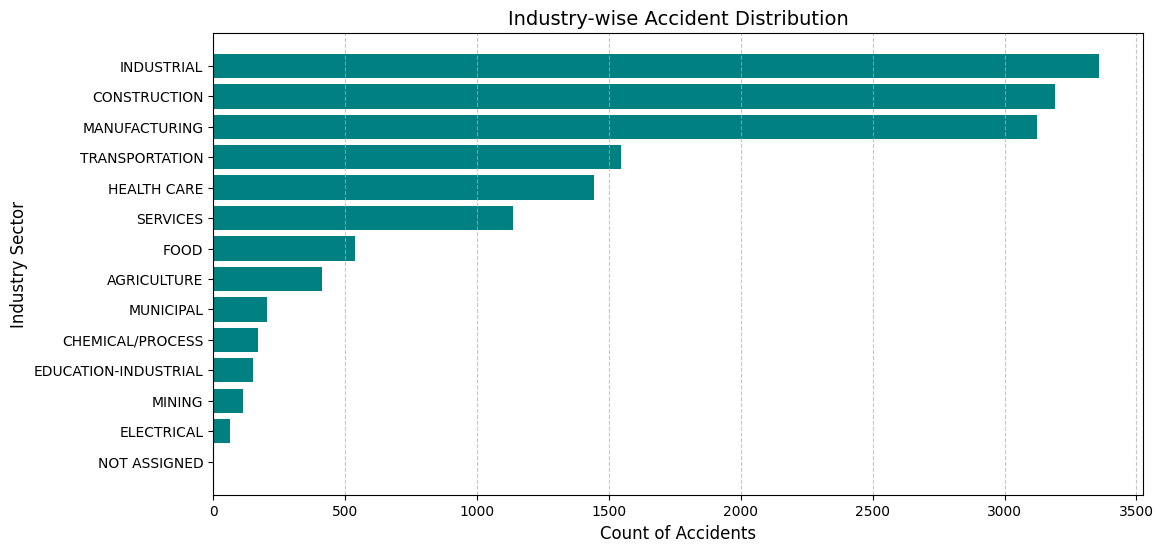

In [39]:
# Aggregate industry-wise incident counts
industry_trend = df2['industry_sector_description'].value_counts().reset_index()
industry_trend.columns = ['industry_sector', 'incident_count']

# Sort industries by incident count in descending order
industry_trend = industry_trend.sort_values(by="incident_count", ascending=True)

# Plot Industry-wise Accident Distribution using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(industry_trend['industry_sector'], industry_trend['incident_count'], color='teal')

plt.title("Industry-wise Accident Distribution", fontsize=14)
plt.xlabel("Count of Accidents", fontsize=12)
plt.ylabel("Industry Sector", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [41]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------- 20.5/301.2 kB ? eta -:--:--
   ------ -------------------------------- 51.2/301.2 kB 871.5 kB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 133.1/301.2 k

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


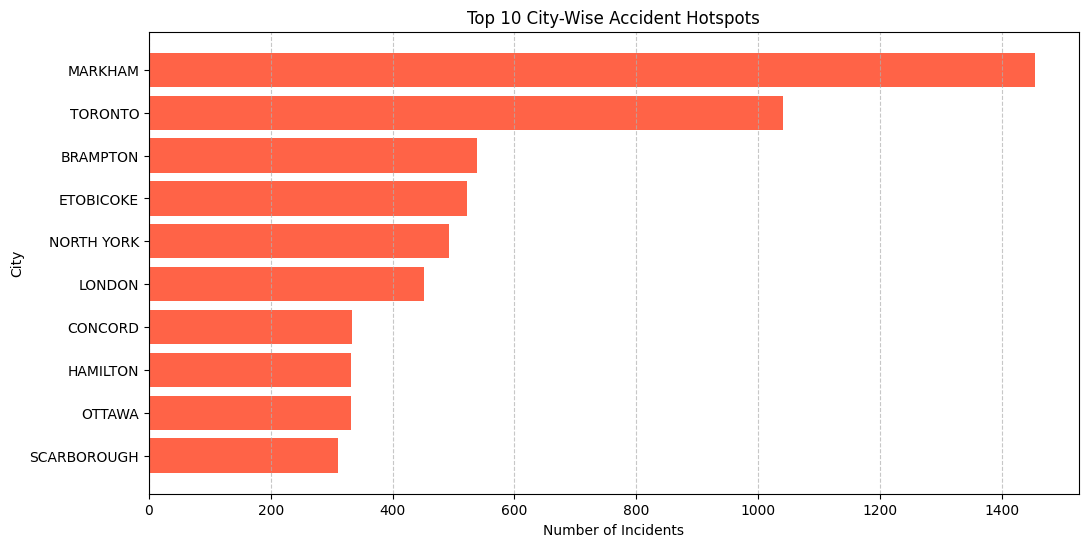

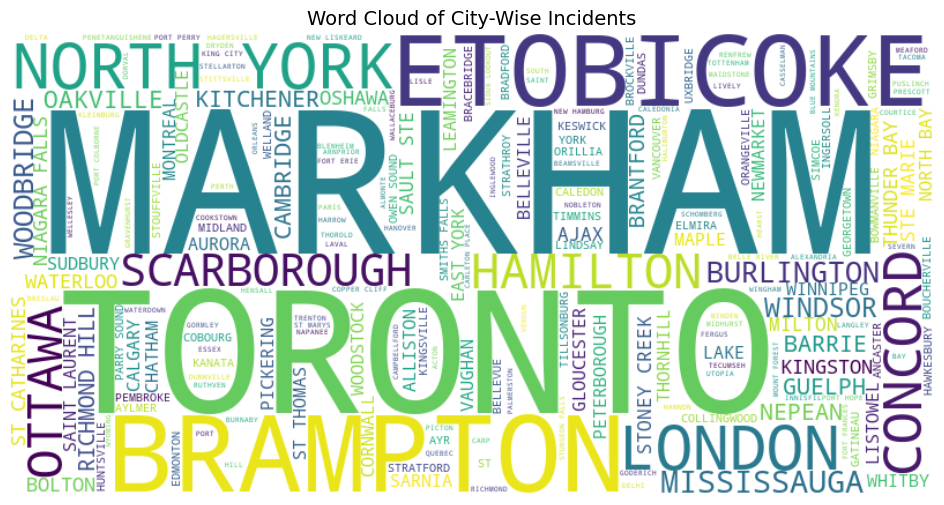

,City,Accident_Count
0,MARKHAM,1454
1,TORONTO,1041
2,BRAMPTON,538
3,ETOBICOKE,522
4,NORTH YORK,492
5,LONDON,452
6,CONCORD,333
7,OTTAWA,331
8,HAMILTON,331
9,SCARBOROUGH,311


In [67]:
# 6.6.1 City-Wise Accident Hotspots
city_trend = df2['organization_city'].value_counts().reset_index()
city_trend.columns = ['city', 'Accident_count']
city_trend = city_trend.sort_values(by="Accident_count", ascending=True).tail(10)  # Top 10 cities

# Plot City-Wise Hotspots
plt.figure(figsize=(12, 6))
plt.barh(city_trend['city'], city_trend['Accident_count'], color='tomato')
plt.xlabel("Number of Incidents")
plt.ylabel("City")
plt.title("Top 10 City-Wise Accident Hotspots")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




# 6.6.3 Word Cloud for City Accidents
from wordcloud import WordCloud

text_city = " ".join(df2['organization_city'].dropna())
wordcloud_city = WordCloud(width=800, height=400, background_color="white").generate(text_city)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_city, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of City-Wise Incidents", fontsize=14)
plt.show()


# Create a table with city-wise accident frequencies
city_accident_table = df2['organization_city'].value_counts().head(10).reset_index()
city_accident_table.columns = ['City', 'Accident_Count']

city_accident_table.head(10)


In [51]:
df2.columns

Index(['accident_date', 'worker_age', 'Occupation_Category_Code',
       'Occupation_Category_Description', 'Occupation_Code',
       'Occupation_Description', 'worker_experience_years',
       'accident_source_category', 'source_category_description',
       'accident_category_description', 'accident_place_description',
       'organization_city', 'organization_province_code',
       'industry_sector_description', 'age_Group', 'accident_year',
       'accident_month'],
      dtype='object')

In [53]:
current_title = "Workplace Accidents Analysis"
print("Current title:", current_title)
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}], [{"type": "xy"}, {"type": "domain"}]],
    subplot_titles=('<b>Top 10 Accident Categories</b>', '<b>Distribution</b>', 
                   '<b>Top 10 Occupations</b>', '<b>Distribution</b>')
)

# Get top 10 values
accidents = df2['accident_category_description'].value_counts().head(10)
occupations = df2['Occupation_Category_Description'].value_counts().head(10)

# Add bar and pie charts
fig.add_trace(go.Bar(x=accidents.values, y=accidents.index, orientation='h'), row=1, col=1)
fig.add_trace(go.Pie(values=accidents.values, labels=accidents.index), row=1, col=2)
fig.add_trace(go.Bar(x=occupations.values, y=occupations.index, orientation='h'), row=2, col=1)
fig.add_trace(go.Pie(values=occupations.values, labels=occupations.index), row=2, col=2)

# Update layout
fig.update_layout(height=1000, width=1400, showlegend=False, title_text="Workplace Accidents Analysis")
fig.write_html("concise_analysis.html")
fig.show()

Current title: Workplace Accidents Analysis


In [26]:
#2: Top 10 Occupations with Most Accidents
occ_cat = df2['Occupation_Category_Description'].value_counts().head(10)

fig2 = go.Figure()
fig2.add_trace(
    go.Bar(
        x=occ_cat.values,
        y=occ_cat.index,
        orientation='h',
        text=occ_cat.values,
        textposition='auto',
        marker_color='lightgreen',
        name='Occupations'
    )
)

fig2.update_layout(
    title={
        'text': 'Top 10 Occupations with Most Accidents',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Number of Cases",
    yaxis_title="Occupation",
    height=600,
    width=1000,
    showlegend=False,
    margin=dict(l=20, r=20, t=100, b=20)
)

fig2.show()


# Print statistics for occupations
print("\
Top 10 Occupations Statistics:")
print(occ_cat)

Top 10 Occupations Statistics:
Occupation_Category_Description
MOTOR VEHICLE AND TRANSIT DRIVERS                       1777
TRADES HELPERS AND LABOURERS                            1216
LONGSHORE WORKERS AND MATERIAL HANDLERS                  893
LABOURERS IN PROCESSING, MANUFACTURING AND UTILITIES     761
RETAIL SALESPERSONS AND SALES CLERKS                     566
CLEANERS                                                 566
ASSISTING OCCUPATIONS IN SUPPORT OF HEALTH SERVICES      547
CARPENTERS AND CABINETMAKERS                             450
OTHER INSTALLERS, REPAIRERS AND SERVICERS                391
AGRICULTURE AND HORTICULTURE WORKERS                     302
Name: count, dtype: int64


In [54]:
df2.columns

Index(['accident_date', 'worker_age', 'Occupation_Category_Code',
       'Occupation_Category_Description', 'Occupation_Code',
       'Occupation_Description', 'worker_experience_years',
       'accident_source_category', 'source_category_description',
       'accident_category_description', 'accident_place_description',
       'organization_city', 'organization_province_code',
       'industry_sector_description', 'age_Group', 'accident_year',
       'accident_month'],
      dtype='object')

In [64]:
df2.dropna(inplace=True)

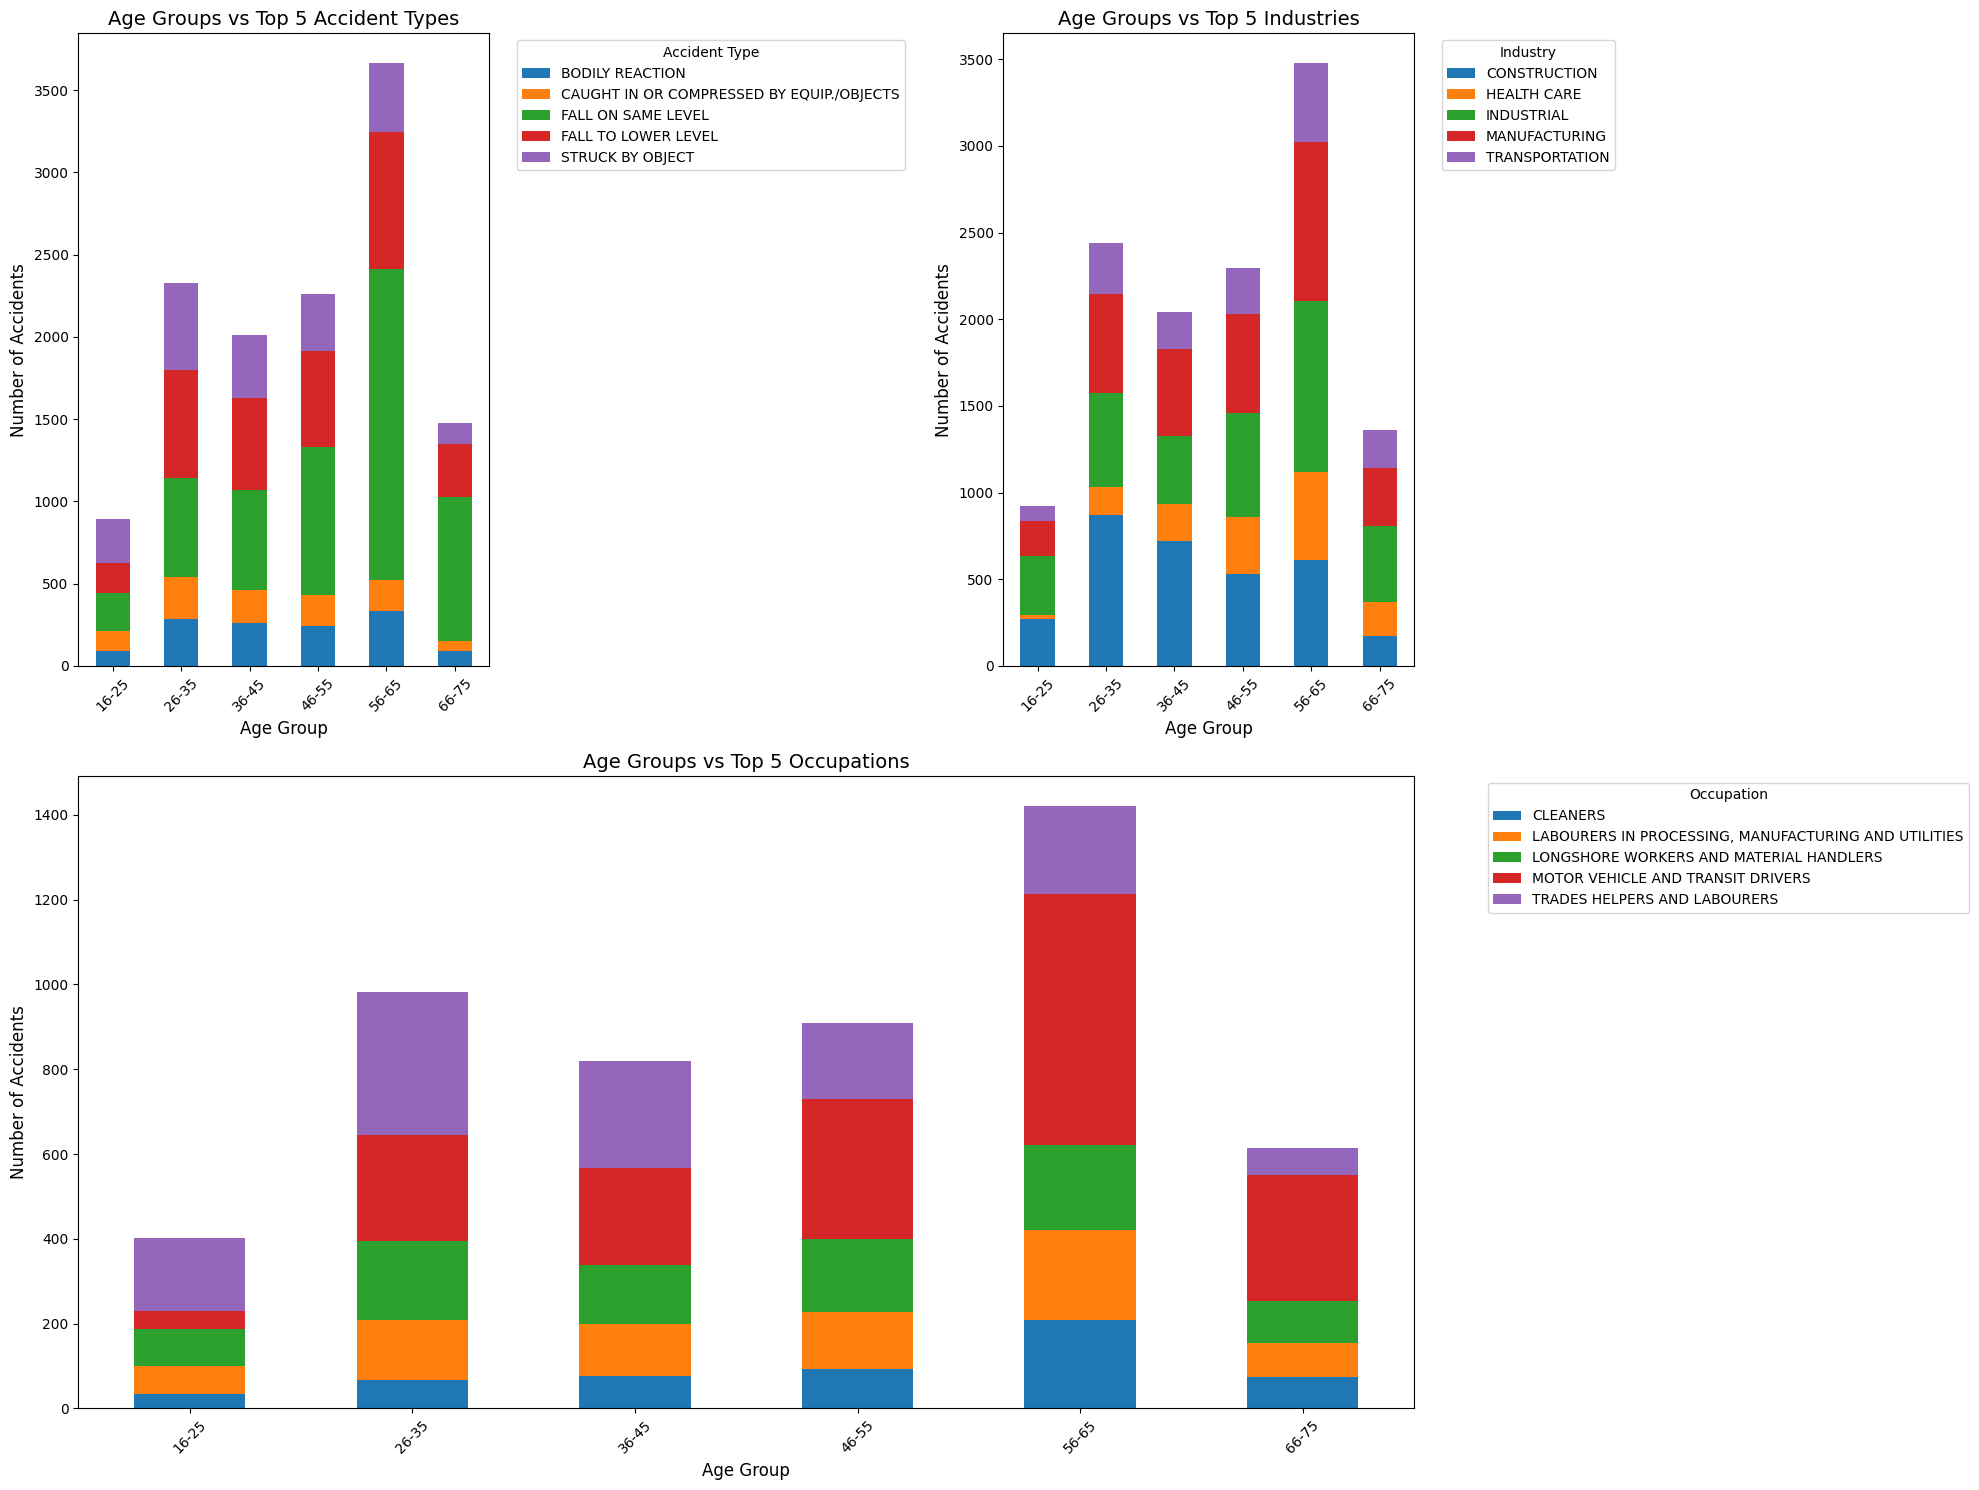


Key Insights by Age Group:

Age Group 56-65:
Total Accidents: 4268
Most Common Accident Type: FALL ON SAME LEVEL
Most Common Industry: INDUSTRIAL
Most Common Occupation: MOTOR VEHICLE AND TRANSIT DRIVERS

Age Group 26-35:
Total Accidents: 2918
Most Common Accident Type: FALL TO LOWER LEVEL
Most Common Industry: CONSTRUCTION
Most Common Occupation: TRADES HELPERS AND LABOURERS

Age Group 66-75:
Total Accidents: 1699
Most Common Accident Type: FALL ON SAME LEVEL
Most Common Industry: INDUSTRIAL
Most Common Occupation: MOTOR VEHICLE AND TRANSIT DRIVERS

Age Group 16-25:
Total Accidents: 1178
Most Common Accident Type: STRUCK BY OBJECT
Most Common Industry: INDUSTRIAL
Most Common Occupation: TRADES HELPERS AND LABOURERS

Age Group 36-45:
Total Accidents: 2488
Most Common Accident Type: FALL ON SAME LEVEL
Most Common Industry: CONSTRUCTION
Most Common Occupation: TRADES HELPERS AND LABOURERS

Age Group 46-55:
Total Accidents: 2731
Most Common Accident Type: FALL ON SAME LEVEL
Most Common I

In [65]:
# Create figure with a grid layout
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# 1. Age Groups vs Top Accident Categories
ax1 = fig.add_subplot(gs[0, 0])
top_accidents = df2['accident_category_description'].value_counts().head(5).index
age_accident_pivot = pd.crosstab(df2['age_Group'], df2['accident_category_description'][df2['accident_category_description'].isin(top_accidents)])
age_accident_pivot.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Age Groups vs Top 5 Accident Types', fontsize=14)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Number of Accidents', fontsize=12)
ax1.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(ax1.get_xticklabels(), rotation=45)

# 2. Age Groups vs Top Industries
ax2 = fig.add_subplot(gs[0, 1])
top_industries = df2['industry_sector_description'].value_counts().head(5).index
age_industry_pivot = pd.crosstab(df2['age_Group'], df2['industry_sector_description'][df2['industry_sector_description'].isin(top_industries)])
age_industry_pivot.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Age Groups vs Top 5 Industries', fontsize=14)
ax2.set_xlabel('Age Group', fontsize=12)
ax2.set_ylabel('Number of Accidents', fontsize=12)
ax2.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(ax2.get_xticklabels(), rotation=45)

# 3. Age Groups vs Top Occupations
ax3 = fig.add_subplot(gs[1, :])
top_occupations = df2['Occupation_Category_Description'].value_counts().head(5).index
age_occupation_pivot = pd.crosstab(df2['age_Group'], df2['Occupation_Category_Description'][df2['Occupation_Category_Description'].isin(top_occupations)])
age_occupation_pivot.plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Age Groups vs Top 5 Occupations', fontsize=14)
ax3.set_xlabel('Age Group', fontsize=12)
ax3.set_ylabel('Number of Accidents', fontsize=12)
ax3.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(ax3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nKey Insights by Age Group:")
for age_group in df2['age_Group'].unique():
    group_data = df2[df2['age_Group'] == age_group]
    
    # Handle empty mode results
    most_common_accident = group_data['accident_category_description'].mode()
    most_common_industry = group_data['industry_sector_description'].mode()
    most_common_occupation = group_data['Occupation_Category_Description'].mode()
    
    most_common_accident = most_common_accident.iloc[0] if not most_common_accident.empty else "No Data"
    most_common_industry = most_common_industry.iloc[0] if not most_common_industry.empty else "No Data"
    most_common_occupation = most_common_occupation.iloc[0] if not most_common_occupation.empty else "No Data"
    
    print(f"\nAge Group {age_group}:")
    print(f"Total Accidents: {len(group_data)}")
    print(f"Most Common Accident Type: {most_common_accident}")
    print(f"Most Common Industry: {most_common_industry}")
    print(f"Most Common Occupation: {most_common_occupation}")
